### Boosting for classification problem

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load data
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=32)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)
acc_gb = accuracy_score(y_test, y_pred_gb)
print("GBM accuracy: ", acc_gb)
print(classification_report(y_test, y_pred_gb, target_names=['malignant','benign']))

xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=100, learning_rate=0.1, random_state=0)

xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost accuracy: ", acc_xgb)
print(classification_report(y_test, y_pred_xgb, target_names=['malignant', 'benign']))

GBM accuracy:  0.958041958041958
              precision    recall  f1-score   support

   malignant       0.94      0.94      0.94        54
      benign       0.97      0.97      0.97        89

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

XGBoost accuracy:  0.951048951048951
              precision    recall  f1-score   support

   malignant       0.93      0.94      0.94        54
      benign       0.97      0.96      0.96        89

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:11:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


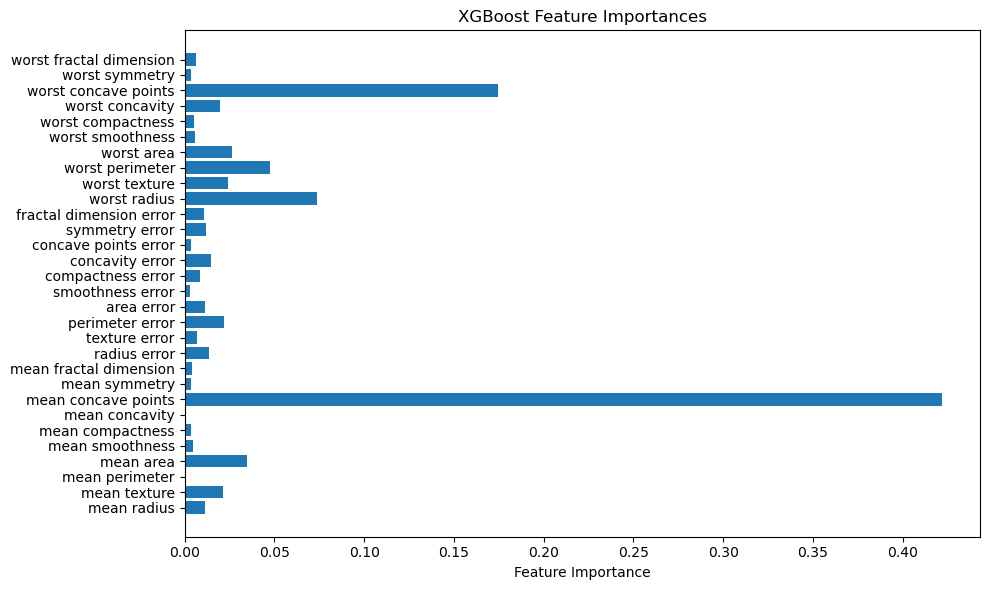

In [2]:
import matplotlib.pyplot as plt

# Get feature importances from the XGBClassifier
feature_importances = xgb_clf.feature_importances_

# Get feature names from the dataset
feature_names = load_breast_cancer().feature_names

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importances")
plt.tight_layout()
plt.show()

### Boosting for Regression

In [6]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

housing = fetch_california_housing()
X, y = housing.data, housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [9]:

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=0)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)
mse = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)
print(f"GBR MSE: {mse:.3f} and R^2 Score: {r2_gbr}")

GBR MSE: 0.290 and R^2 Score: 0.7809004568284745


In [10]:
# 1. imports
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

# 2. Load Dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# 3. split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 4. Base Model (no hyperparameters initially)
xgb = XGBClassifier(eval_metric = 'logloss')

# 5. Param grid using
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4],
    'learning_rate': [0.1, 0.05],
    'gamma': [0, 1],
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.7, 0.8],
    'reg_alpha': [0, 0.5],
    'reg_lambda': [1, 1.5],
}

# 6. GridSearchcv
grid = GridSearchCV(xgb, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8], 'gamma': [0, 1],
                         'learning_rate': [0.1, 0.05], 'max_depth': [3, 4],
                         'n_estimators': [100, 200], 'reg_alpha': [0, 0.5],
                         'reg_lambda': [1, 1.5], 'subsample': [0.7, 0.8]},
             scoring='accuracy')

Best Performance {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.7}
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        48
           1       0.96      1.00      0.98        66

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



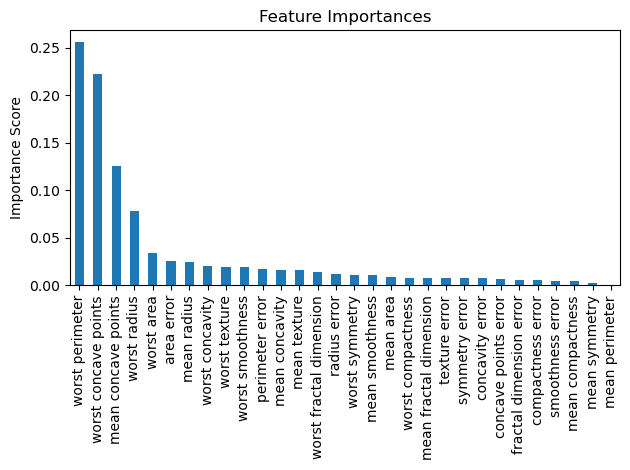

In [11]:
# Evaluation
print("Best Performance", grid.best_params_)
y_pred = grid.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

# 8. Feature Importance
importances = grid.best_estimator_.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# 9. Plot
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.tight_layout()
plt.show()

In [14]:
# dataset 
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# model
xgb = XGBRegressor(eval_metric='rmse')

# param grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.01],
    'gamma': [0, 1],
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.7, 0.8],
    'reg_alpha' :[0, 0.05],
    'reg_lambda': [1, 1.5]
}

grid = GridSearchCV(xgb, param_grid=param_grid, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)



In [15]:
grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False,
                                    eval_metric='rmse', feature_types=None,
                                    feature_weights=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=No...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8], 'gamma': [0, 1],
                         'learning_rate': [0.01, 0.01], 'max_depth': [3, 5],
                         'n_estimators': [100, 200], 'reg_alpha': [0, 0.05],
                         'reg_lambda': [1, 1.5], 'subsample': [0.7, 0.8]},
             scoring='neg_root_mean_squared_error')